In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
from scipy import stats
import math
import shap
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [163]:
#Cleaning the training Data

In [164]:
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [165]:
df_train.shape

(1460, 81)

<AxesSubplot:>

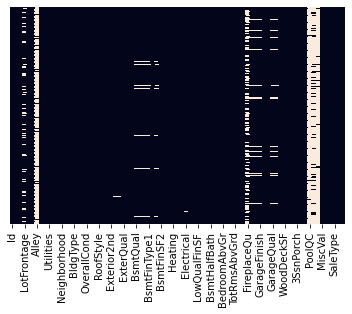

In [166]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [167]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [168]:
df_train['BsmtCond']

0        TA
1        TA
2        TA
3        Gd
4        TA
5        TA
6        TA
7        TA
8        TA
9        TA
10       TA
11       TA
12       TA
13       TA
14       TA
15       TA
16       TA
17      NaN
18       TA
19       TA
20       TA
21       TA
22       TA
23       TA
24       TA
25       TA
26       TA
27       TA
28       TA
29       TA
30       TA
31       TA
32       TA
33       TA
34       TA
35       TA
36       TA
37       TA
38       TA
39      NaN
40       TA
41       TA
42       TA
43       TA
44       TA
45       TA
46       TA
47       TA
48       TA
49       TA
50       TA
51       TA
52       TA
53       TA
54       TA
55       TA
56       TA
57       TA
58       TA
59       TA
60       TA
61       Fa
62       Gd
63       TA
64       TA
65       TA
66       TA
67       TA
68       TA
69       TA
70       TA
71       TA
72       TA
73       TA
74       TA
75       TA
76       TA
77       TA
78       TA
79       TA
80       TA
81       Gd
82       TA
83  

In [169]:
df_train['LotFrontage']=df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean())
df_train['BsmtCond']=df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtQual']=df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['FireplaceQu']=df_train['FireplaceQu'].fillna(df_train['FireplaceQu'].mode()[0])
df_train['GarageType']=df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])

In [170]:
df_train['GarageFinish']=df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['GarageQual']=df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])
df_train['GarageCond']=df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])

In [171]:
df_train.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df_train.drop(['Alley'],axis=1,inplace=True)

<AxesSubplot:>

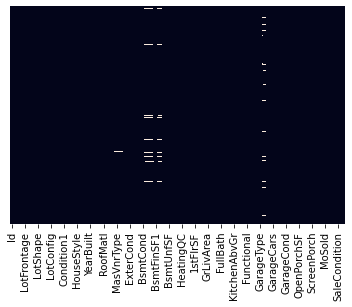

In [172]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [173]:
df_train['GarageType'] = df_train['GarageType'].fillna(df_train['GarageType'].mode()[0])

<AxesSubplot:>

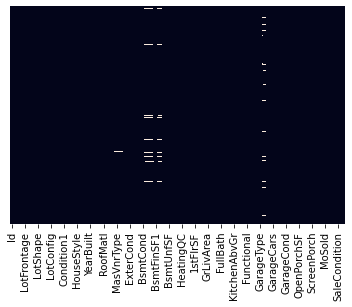

In [174]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [175]:
df_train.drop(['GarageYrBlt'],axis=1,inplace=True)

<AxesSubplot:>

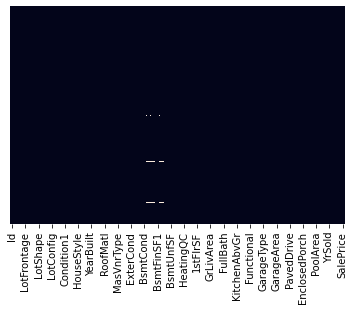

In [176]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [177]:
df_train.isnull().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [178]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [179]:
df_train['BsmtFinType2']=df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])

<AxesSubplot:>

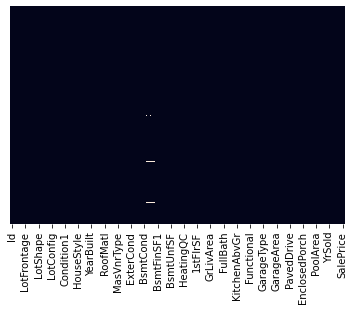

In [180]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [181]:
df_train.dropna(inplace=True)

In [182]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1413 non-null   int64  
 1   MSSubClass     1413 non-null   int64  
 2   MSZoning       1413 non-null   object 
 3   LotFrontage    1413 non-null   float64
 4   LotArea        1413 non-null   int64  
 5   Street         1413 non-null   object 
 6   LotShape       1413 non-null   object 
 7   LandContour    1413 non-null   object 
 8   Utilities      1413 non-null   object 
 9   LotConfig      1413 non-null   object 
 10  LandSlope      1413 non-null   object 
 11  Neighborhood   1413 non-null   object 
 12  Condition1     1413 non-null   object 
 13  Condition2     1413 non-null   object 
 14  BldgType       1413 non-null   object 
 15  HouseStyle     1413 non-null   object 
 16  OverallQual    1413 non-null   int64  
 17  OverallCond    1413 non-null   int64  
 18  YearBuil

In [183]:
df_train.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1459
Columns: 76 entries, Id to SalePrice
dtypes: float64(2), int64(35), object(39)
memory usage: 850.0+ KB


In [184]:
#converting categorical data to numerical

In [185]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [189]:
def category_onehot_multcols(multcolumns):
    df_final=dataf
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(dataf[fields],drop_first=True)
        
        dataf.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([dataf,df_final],axis=1)
        
    return df_final


In [26]:
DF=df_train.copy()
DF.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
#Cleaning the test data

In [28]:
df_test=pd.read_csv('test.csv')

In [29]:
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [30]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [31]:
df_test['LotFrontage']=df_test['LotFrontage'].fillna(df_test['LotFrontage'].mean())
df_test['BsmtCond']=df_test['BsmtCond'].fillna(df_test['BsmtCond'].mode()[0])
df_test['BsmtQual']=df_test['BsmtQual'].fillna(df_test['BsmtQual'].mode()[0])
df_test['FireplaceQu']=df_test['FireplaceQu'].fillna(df_test['FireplaceQu'].mode()[0])
df_test['GarageType']=df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [32]:
df_test['GarageFinish']=df_test['GarageFinish'].fillna(df_test['GarageFinish'].mode()[0])
df_test['GarageQual']=df_test['GarageQual'].fillna(df_test['GarageQual'].mode()[0])
df_test['GarageCond']=df_test['GarageCond'].fillna(df_test['GarageCond'].mode()[0])

In [33]:
df_test.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
df_test.drop(['Alley'],axis=1,inplace=True)

In [34]:
df_test['GarageType'] = df_test['GarageType'].fillna(df_test['GarageType'].mode()[0])

In [35]:
df_test.drop(['GarageYrBlt'],axis=1,inplace=True)

<AxesSubplot:>

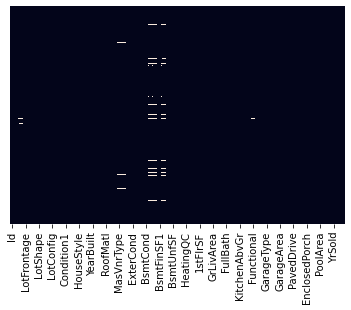

In [36]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [37]:
df_test['BsmtFinType2']=df_test['BsmtFinType2'].fillna(df_test['BsmtFinType2'].mode()[0])

<AxesSubplot:>

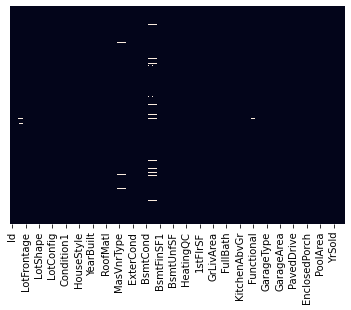

In [38]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [39]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1457 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [40]:
df_test.dropna(inplace=True)

In [41]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1392 non-null   int64  
 1   MSSubClass     1392 non-null   int64  
 2   MSZoning       1392 non-null   object 
 3   LotFrontage    1392 non-null   float64
 4   LotArea        1392 non-null   int64  
 5   Street         1392 non-null   object 
 6   LotShape       1392 non-null   object 
 7   LandContour    1392 non-null   object 
 8   Utilities      1392 non-null   object 
 9   LotConfig      1392 non-null   object 
 10  LandSlope      1392 non-null   object 
 11  Neighborhood   1392 non-null   object 
 12  Condition1     1392 non-null   object 
 13  Condition2     1392 non-null   object 
 14  BldgType       1392 non-null   object 
 15  HouseStyle     1392 non-null   object 
 16  OverallQual    1392 non-null   int64  
 17  OverallCond    1392 non-null   int64  
 18  YearBuil

In [42]:
df_train.shape

(1413, 76)

In [43]:
df_test.shape

(1392, 75)

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1413 non-null   int64  
 1   MSSubClass     1413 non-null   int64  
 2   MSZoning       1413 non-null   object 
 3   LotFrontage    1413 non-null   float64
 4   LotArea        1413 non-null   int64  
 5   Street         1413 non-null   object 
 6   LotShape       1413 non-null   object 
 7   LandContour    1413 non-null   object 
 8   Utilities      1413 non-null   object 
 9   LotConfig      1413 non-null   object 
 10  LandSlope      1413 non-null   object 
 11  Neighborhood   1413 non-null   object 
 12  Condition1     1413 non-null   object 
 13  Condition2     1413 non-null   object 
 14  BldgType       1413 non-null   object 
 15  HouseStyle     1413 non-null   object 
 16  OverallQual    1413 non-null   int64  
 17  OverallCond    1413 non-null   int64  
 18  YearBuil

In [45]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1458
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1392 non-null   int64  
 1   MSSubClass     1392 non-null   int64  
 2   MSZoning       1392 non-null   object 
 3   LotFrontage    1392 non-null   float64
 4   LotArea        1392 non-null   int64  
 5   Street         1392 non-null   object 
 6   LotShape       1392 non-null   object 
 7   LandContour    1392 non-null   object 
 8   Utilities      1392 non-null   object 
 9   LotConfig      1392 non-null   object 
 10  LandSlope      1392 non-null   object 
 11  Neighborhood   1392 non-null   object 
 12  Condition1     1392 non-null   object 
 13  Condition2     1392 non-null   object 
 14  BldgType       1392 non-null   object 
 15  HouseStyle     1392 non-null   object 
 16  OverallQual    1392 non-null   int64  
 17  OverallCond    1392 non-null   int64  
 18  YearBuil

In [46]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [47]:
dataf=pd.concat([df_train,df_test],axis=0)
dataf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0


In [48]:
dataf.shape

(2805, 76)

In [49]:
dataf['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2805, dtype: float64

In [50]:
#feature selection

In [51]:
dataf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2805 non-null   int64  
 1   MSSubClass     2805 non-null   int64  
 2   MSZoning       2805 non-null   object 
 3   LotFrontage    2805 non-null   float64
 4   LotArea        2805 non-null   int64  
 5   Street         2805 non-null   object 
 6   LotShape       2805 non-null   object 
 7   LandContour    2805 non-null   object 
 8   Utilities      2805 non-null   object 
 9   LotConfig      2805 non-null   object 
 10  LandSlope      2805 non-null   object 
 11  Neighborhood   2805 non-null   object 
 12  Condition1     2805 non-null   object 
 13  Condition2     2805 non-null   object 
 14  BldgType       2805 non-null   object 
 15  HouseStyle     2805 non-null   object 
 16  OverallQual    2805 non-null   int64  
 17  OverallCond    2805 non-null   int64  
 18  YearBuil

In [52]:
pd.options.display.max_rows = 4000

In [53]:
dataf.var().sort_values(ascending=False)

SalePrice        6.286639e+09
LotArea          6.193668e+07
Id               7.099469e+05
MiscVal          3.297951e+05
GrLivArea        2.558360e+05
BsmtFinSF1       2.075075e+05
BsmtUnfSF        1.890862e+05
2ndFlrSF         1.841087e+05
TotalBsmtSF      1.682226e+05
1stFlrSF         1.520809e+05
GarageArea       4.606585e+04
MasVnrArea       3.278101e+04
BsmtFinSF2       2.942089e+04
WoodDeckSF       1.627353e+04
OpenPorchSF      4.551768e+03
EnclosedPorch    4.141538e+03
ScreenPorch      3.186992e+03
LowQualFinSF     2.219907e+03
MSSubClass       1.828502e+03
PoolArea         1.212071e+03
YearBuilt        9.225722e+02
3SsnPorch        6.487401e+02
LotFrontage      4.544736e+02
YearRemodAdd     4.288863e+02
MoSold           7.374936e+00
TotRmsAbvGrd     2.443155e+00
OverallQual      1.901495e+00
YrSold           1.737039e+00
OverallCond      1.213182e+00
BedroomAbvGr     6.588556e-01
GarageCars       5.732524e-01
Fireplaces       4.173788e-01
FullBath         3.036754e-01
BsmtFullBa

In [54]:
dataf.drop(['YrSold','BsmtFullBath','TotRmsAbvGrd','LowQualFinSF'],axis=1,inplace=True)

In [55]:
dataf.var().sort_values(ascending=True)

KitchenAbvGr     3.795825e-02
BsmtHalfBath     6.261668e-02
HalfBath         2.534342e-01
FullBath         3.036754e-01
Fireplaces       4.173788e-01
GarageCars       5.732524e-01
BedroomAbvGr     6.588556e-01
OverallCond      1.213182e+00
OverallQual      1.901495e+00
MoSold           7.374936e+00
YearRemodAdd     4.288863e+02
LotFrontage      4.544736e+02
3SsnPorch        6.487401e+02
YearBuilt        9.225722e+02
PoolArea         1.212071e+03
MSSubClass       1.828502e+03
ScreenPorch      3.186992e+03
EnclosedPorch    4.141538e+03
OpenPorchSF      4.551768e+03
WoodDeckSF       1.627353e+04
BsmtFinSF2       2.942089e+04
MasVnrArea       3.278101e+04
GarageArea       4.606585e+04
1stFlrSF         1.520809e+05
TotalBsmtSF      1.682226e+05
2ndFlrSF         1.841087e+05
BsmtUnfSF        1.890862e+05
BsmtFinSF1       2.075075e+05
GrLivArea        2.558360e+05
MiscVal          3.297951e+05
Id               7.099469e+05
LotArea          6.193668e+07
SalePrice        6.286639e+09
dtype: flo

In [56]:
dataf.drop(['WoodDeckSF','ScreenPorch','GrLivArea','BedroomAbvGr','3SsnPorch','YearRemodAdd'],axis=1,inplace=True)

In [57]:
dataf.drop(['Id'],axis=1,inplace=True)

In [58]:
dataf.shape

(2805, 65)

In [59]:
dfcor=dataf.copy()
dfcor.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,61,0,0,0,2,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,0,0,0,0,5,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,42,0,0,0,9,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,35,272,0,0,2,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,84,0,0,0,12,WD,Normal,250000.0


In [60]:
dfcor.drop(['SalePrice'],axis=1,inplace=True)
dfcor.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageQual,GarageCond,PavedDrive,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,61,0,0,0,2,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,0,0,0,0,5,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,TA,TA,Y,42,0,0,0,9,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,TA,TA,Y,35,272,0,0,2,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,TA,TA,Y,84,0,0,0,12,WD,Normal


In [61]:
dfcor.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,HalfBath,KitchenAbvGr,Fireplaces,GarageCars,GarageArea,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold
MSSubClass,1.000000,-0.393015,-0.200110,0.030295,-0.072651,0.033484,0.003966,-0.067001,-0.073299,-0.131844,...,0.181756,0.247637,-0.052282,-0.048616,-0.105756,-0.013101,-0.018142,0.001419,-0.035805,-0.002026
LotFrontage,-0.393015,1.000000,0.355000,0.223795,-0.066873,0.124424,0.209313,0.215875,0.043075,0.114089,...,0.035136,0.012146,0.239223,0.296138,0.344908,0.144988,0.011707,0.136903,0.037412,0.007189
LotArea,-0.200110,0.355000,1.000000,0.117429,-0.021172,0.036652,0.132502,0.205085,0.088310,0.023769,...,0.036989,-0.014590,0.263489,0.183206,0.216531,0.097674,0.015620,0.076280,0.071603,0.008261
OverallQual,0.030295,0.223795,0.117429,1.000000,-0.128597,0.595630,0.432046,0.259605,-0.053204,0.241813,...,0.260365,-0.129443,0.385793,0.608658,0.568069,0.292941,-0.144834,0.044324,0.008064,0.022991
OverallCond,-0.072651,-0.066873,-0.021172,-0.128597,1.000000,-0.394266,-0.146732,-0.068049,0.036285,-0.154853,...,-0.098212,-0.072712,-0.044618,-0.199299,-0.173210,-0.078323,0.081029,-0.016519,0.035334,-0.003344
YearBuilt,0.033484,0.124424,0.036652,0.595630,-0.394266,1.000000,0.309993,0.275681,-0.030632,0.113530,...,0.262365,-0.144349,0.167822,0.540020,0.480149,0.196633,-0.378161,0.005368,-0.008037,0.005599
MasVnrArea,0.003966,0.209313,0.132502,0.432046,-0.146732,0.309993,1.000000,0.297766,-0.021942,0.077819,...,0.189595,-0.038781,0.270896,0.363287,0.374059,0.142766,-0.113566,0.007208,0.046813,-0.003801
BsmtFinSF1,-0.067001,0.215875,0.205085,0.259605,-0.068049,0.275681,0.297766,1.000000,-0.064100,-0.529849,...,-0.021057,-0.055854,0.287552,0.251792,0.306624,0.114949,-0.105634,0.093843,0.097652,-0.002951
BsmtFinSF2,-0.073299,0.043075,0.088310,-0.053204,0.036285,-0.030632,-0.021942,-0.064100,1.000000,-0.253848,...,-0.034593,-0.028497,0.060447,-0.015661,0.002054,-0.006445,0.035140,0.047908,-0.004754,-0.011444
BsmtUnfSF,-0.131844,0.114089,0.023769,0.241813,-0.154853,0.113530,0.077819,-0.529849,-0.253848,1.000000,...,-0.057694,0.136944,-0.013154,0.169477,0.152584,0.109195,0.007602,-0.029269,-0.009726,0.022246


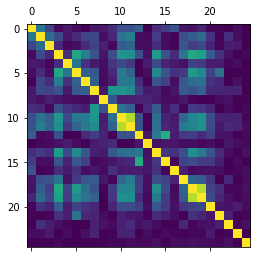

In [62]:
plt.matshow(dfcor.corr().abs())

In [63]:
dataf=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [64]:
dataf.to_csv('dataf.csv',index=False)

In [65]:
dataf.shape

(2805, 223)

In [66]:
dataf=dataf.loc[:,~dataf.columns.duplicated()]

In [67]:
dataf.shape

(2805, 163)

In [68]:
#give dummy value to df_test values to prevent nan generation

In [69]:
#def clean_dataset(df):
#    assert isinstance(df, pd.DataFrame)
#    df.dropna(inplace=True)
#    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#    return df[indices_to_keep].astype(np.float64)

In [70]:
#clean_dataset(dataf)

In [71]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Columns: 163 entries, MSSubClass to P
dtypes: float64(10), int64(16), uint8(137)
memory usage: 967.0 KB


In [72]:
dataf.var()

MSSubClass       1.828502e+03
LotFrontage      4.544736e+02
LotArea          6.193668e+07
OverallQual      1.901495e+00
OverallCond      1.213182e+00
YearBuilt        9.225722e+02
MasVnrArea       3.278101e+04
BsmtFinSF1       2.075075e+05
BsmtFinSF2       2.942089e+04
BsmtUnfSF        1.890862e+05
TotalBsmtSF      1.682226e+05
1stFlrSF         1.520809e+05
2ndFlrSF         1.841087e+05
BsmtHalfBath     6.261668e-02
FullBath         3.036754e-01
HalfBath         2.534342e-01
KitchenAbvGr     3.795825e-02
Fireplaces       4.173788e-01
GarageCars       5.732524e-01
GarageArea       4.606585e+04
OpenPorchSF      4.551768e+03
EnclosedPorch    4.141538e+03
PoolArea         1.212071e+03
MiscVal          3.297951e+05
MoSold           7.374936e+00
SalePrice        6.286639e+09
FV               4.453709e-02
RH               8.485967e-03
RL               1.734286e-01
RM               1.340110e-01
Pave             3.907583e-03
IR2              2.535670e-02
IR3              5.673586e-03
Reg       

In [73]:
corr_matrix = dataf.corr().abs()
corr_matrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
MSSubClass,1.000000,0.393015,0.200110,0.030295,0.072651,0.033484,0.003966,0.067001,0.073299,0.131844,...,0.030502,0.003340,0.002020,0.123359,0.062997,0.080079,0.048778,0.057701,0.050148,0.022298
LotFrontage,0.393015,1.000000,0.355000,0.223795,0.066873,0.124424,0.209313,0.215875,0.043075,0.114089,...,0.005746,0.001192,0.006967,0.180672,0.018150,0.080837,0.017226,0.253567,0.106847,0.009059
LotArea,0.200110,0.355000,1.000000,0.117429,0.021172,0.036652,0.132502,0.205085,0.088310,0.023769,...,0.039432,0.018897,0.060465,0.107550,0.010469,0.040288,0.002268,0.147035,0.021717,0.013926
OverallQual,0.030295,0.223795,0.117429,1.000000,0.128597,0.595630,0.432046,0.259605,0.053204,0.241813,...,0.076841,0.105028,0.156307,0.248352,0.047931,0.196332,0.077738,0.343348,0.202196,0.081039
OverallCond,0.072651,0.066873,0.021172,0.128597,1.000000,0.394266,0.146732,0.068049,0.036285,0.154853,...,0.016429,0.013675,0.042572,0.173983,0.014814,0.084778,0.010169,0.241771,0.107384,0.075206
YearBuilt,0.033484,0.124424,0.036652,0.595630,0.394266,1.000000,0.309993,0.275681,0.030632,0.113530,...,0.079780,0.121575,0.165540,0.387206,0.036916,0.209454,0.049461,0.510361,0.301081,0.177227
MasVnrArea,0.003966,0.209313,0.132502,0.432046,0.146732,0.309993,1.000000,0.297766,0.021942,0.077819,...,0.022821,0.034004,0.058575,0.149767,0.003483,0.070802,0.023988,0.192539,0.103043,0.072785
BsmtFinSF1,0.067001,0.215875,0.205085,0.259605,0.068049,0.275681,0.297766,1.000000,0.064100,0.529849,...,0.015617,0.031763,0.024288,0.248769,0.005629,0.073048,0.005027,0.226663,0.070498,0.075832
BsmtFinSF2,0.073299,0.043075,0.088310,0.053204,0.036285,0.030632,0.021942,0.064100,1.000000,0.253848,...,0.050157,0.022948,0.078239,0.058059,0.004232,0.066246,0.031884,0.028074,0.001968,0.030967
BsmtUnfSF,0.131844,0.114089,0.023769,0.241813,0.154853,0.113530,0.077819,0.529849,0.253848,1.000000,...,0.047750,0.014103,0.031984,0.040885,0.071912,0.048554,0.049841,0.051056,0.077458,0.025257


In [74]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

In [75]:
#upper = dataf.where(np.triu(np.ones(dataf.shape), k=1).astype(np.bool))

In [76]:
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

In [77]:
dataf.drop(to_drop,axis=1,inplace=True)

In [78]:
#PCA Implementation

In [79]:
x = StandardScaler().fit_transform(dataf)
x= pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.061956,-0.194886,-0.210112,0.627318,-0.533505,0.505472,0.552233,-0.298333,1.198235,-0.255066,...,0.293166,-0.050018,-0.142727,-0.149098,0.742589,-0.114022,-0.262638,-0.065547,1.594261,-0.14658
1,-0.873643,0.508857,-0.063961,-0.098002,2.190674,-0.577264,1.149446,-0.298333,-0.792430,3.741918,...,0.293166,-0.050018,-0.142727,-0.149098,0.742589,-0.114022,-0.262638,-0.065547,1.594261,-0.14658
2,0.061956,-0.054137,0.145734,0.627318,-0.533505,0.317650,0.069193,-0.298333,1.226207,-0.255066,...,0.293166,-0.050018,-0.142727,-0.149098,0.742589,-0.114022,-0.262638,-0.065547,1.594261,-0.14658
3,0.295856,-0.429467,-0.070315,0.627318,-0.533505,-0.577264,-0.523629,-0.298333,0.969798,-0.255066,...,0.293166,-0.050018,-0.142727,-0.149098,-1.346640,-0.114022,-0.262638,-0.065547,-0.627250,-0.14658
4,0.061956,0.696522,0.528268,1.352638,-0.533505,1.356192,0.440255,-0.298333,1.662102,-0.255066,...,0.293166,-0.050018,-0.142727,-0.149098,0.742589,-0.114022,-0.262638,-0.065547,1.594261,-0.14658


In [80]:
pca=PCA()

In [81]:
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.847924,-1.651036,-0.780865,-0.621965,0.389829,-0.629725,1.562450,-0.480094,-0.129644,0.733893,...,0.468382,-0.033625,-0.194041,0.281286,0.268781,-0.155789,-0.005004,0.000757,0.171773,0.067275
1,1.218533,1.782382,-1.456628,0.402932,-0.020422,-0.744899,-0.776594,-0.302868,-3.998864,0.953738,...,-0.453174,0.081366,0.760086,0.425839,-0.392093,0.147638,-0.070469,-0.420609,0.351459,-0.157827
2,2.088851,-1.430105,-0.051057,-0.342015,0.810121,-0.984066,0.349923,-0.806428,0.025737,1.287137,...,0.673226,0.230472,-0.461954,0.152260,0.029394,-0.178794,0.198774,0.052386,0.075107,0.061927
3,-0.608459,-0.429854,2.004187,-0.678985,-2.115496,-0.514214,-2.022817,0.073901,-0.612692,0.266975,...,-0.109414,-0.150688,0.793127,-0.575565,0.748901,-0.282851,0.085342,-0.010996,0.425235,-0.103660
4,3.464773,-1.865142,0.640805,0.102120,-0.163126,-0.954594,-0.061682,1.846994,-2.813804,0.298429,...,0.102270,0.039884,0.844346,-0.245833,-0.129459,-0.120637,0.280262,0.004226,0.144867,-0.031750


In [82]:
explained_variance = pca.explained_variance_ratio_
explained_variance
#np.sort(explained_variance)

array([0.03875152, 0.02815173, 0.0231726 , 0.02042008, 0.01679422,
       0.01618901, 0.01558189, 0.01504873, 0.01354169, 0.01334127,
       0.01289323, 0.01282106, 0.01255093, 0.01198697, 0.01190644,
       0.01176519, 0.01157959, 0.01143688, 0.01112064, 0.01078595,
       0.01073766, 0.0104019 , 0.01027152, 0.01019062, 0.00996691,
       0.00980438, 0.00977514, 0.00960988, 0.00944892, 0.00943741,
       0.00936478, 0.00930764, 0.0092224 , 0.00916945, 0.0091024 ,
       0.00904964, 0.00897288, 0.00889103, 0.00880661, 0.00868409,
       0.00858668, 0.00847298, 0.00844676, 0.00839517, 0.00829758,
       0.00823305, 0.00816983, 0.00814111, 0.00811387, 0.0080569 ,
       0.00798981, 0.00795337, 0.00793693, 0.00789251, 0.00784388,
       0.00781861, 0.00775293, 0.00773592, 0.00760004, 0.00756214,
       0.0074804 , 0.00741495, 0.00735841, 0.00730623, 0.0072396 ,
       0.00720064, 0.00711934, 0.00708934, 0.00693834, 0.00691201,
       0.0068484 , 0.00683724, 0.00678585, 0.00677287, 0.00666

In [83]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

In [84]:
t=dataf.columns
t
#dataf[t[0]]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', '2ndFlrSF', 'BsmtHalfBath',
       ...
       'SBrkr', 'Maj2', 'Min1', 'Min2', 'Attchd', 'Basment', 'BuiltIn',
       'CarPort', 'RFn', 'P'],
      dtype='object', length=128)

In [85]:
n=len(explained_variance)
#print(n)
for i  in range(n):
    if(explained_variance[i]<0.01):
        print(t[i])
        dataf.drop([t[i]],axis=1,inplace=True)

HLS
Low
NoSeWa
CulDSac
FR2
FR3
Inside
Mod
Sev
Blueste
BrDale
BrkSide
ClearCr
CollgCr
Crawfor
Edwards
Gilbert
IDOTRR
MeadowV
Mitchel
NAmes
NPkVill
NWAmes
NoRidge
NridgHt
SWISU
Sawyer
SawyerW
StoneBr
Timber
Veenker
Feedr
PosA
PosN
RRAe
RRAn
RRNn
2fmCon
Twnhs
RRNe
1.5Unf
2.5Fin
2.5Unf
SFoyer
SLvl
CWD
Con
ConLD
ConLI
ConLw
New
Oth
AdjLand
Alloca
Family
Fa
Gd
Po
CBlock
Stone
Wood
Mn
No
BLQ
LwQ
Rec
Gable
Gambrel
Mansard
Shed
CompShg
Membran
Metal
Roll
WdShake
WdShngl
AsphShn
BrkComm
BrkFace
HdBoard
ImStucc
MetalSd
Plywood
Stucco
Wd Sdng
WdShing
Other
GasW
Grav
OthW
Y
FuseF
FuseP
Mix
SBrkr
Maj2
Min1
Min2
Attchd
Basment
BuiltIn
CarPort
RFn
P


In [86]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2805 non-null   int64  
 1   LotFrontage    2805 non-null   float64
 2   LotArea        2805 non-null   int64  
 3   OverallQual    2805 non-null   int64  
 4   OverallCond    2805 non-null   int64  
 5   MasVnrArea     2805 non-null   float64
 6   BsmtFinSF1     2805 non-null   float64
 7   BsmtFinSF2     2805 non-null   float64
 8   2ndFlrSF       2805 non-null   int64  
 9   BsmtHalfBath   2805 non-null   float64
 10  KitchenAbvGr   2805 non-null   int64  
 11  Fireplaces     2805 non-null   int64  
 12  OpenPorchSF    2805 non-null   int64  
 13  EnclosedPorch  2805 non-null   int64  
 14  PoolArea       2805 non-null   int64  
 15  MiscVal        2805 non-null   int64  
 16  MoSold         2805 non-null   int64  
 17  FV             2805 non-null   uint8  
 18  RH      

In [87]:
#creating own features

In [88]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2805 non-null   int64  
 1   LotFrontage    2805 non-null   float64
 2   LotArea        2805 non-null   int64  
 3   OverallQual    2805 non-null   int64  
 4   OverallCond    2805 non-null   int64  
 5   MasVnrArea     2805 non-null   float64
 6   BsmtFinSF1     2805 non-null   float64
 7   BsmtFinSF2     2805 non-null   float64
 8   2ndFlrSF       2805 non-null   int64  
 9   BsmtHalfBath   2805 non-null   float64
 10  KitchenAbvGr   2805 non-null   int64  
 11  Fireplaces     2805 non-null   int64  
 12  OpenPorchSF    2805 non-null   int64  
 13  EnclosedPorch  2805 non-null   int64  
 14  PoolArea       2805 non-null   int64  
 15  MiscVal        2805 non-null   int64  
 16  MoSold         2805 non-null   int64  
 17  FV             2805 non-null   uint8  
 18  RH      

In [89]:
dataf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,BsmtHalfBath,...,PoolArea,MiscVal,MoSold,FV,RH,RL,Pave,IR2,IR3,Reg
0,60,65.0,8450,7,5,196.0,706.0,0.0,854,0.0,...,0,0,2,0,0,1,1,0,0,1
1,20,80.0,9600,6,8,0.0,978.0,0.0,0,1.0,...,0,0,5,0,0,1,1,0,0,1
2,60,68.0,11250,7,5,162.0,486.0,0.0,866,0.0,...,0,0,9,0,0,1,1,0,0,0
3,70,60.0,9550,7,5,0.0,216.0,0.0,756,0.0,...,0,0,2,0,0,1,1,0,0,0
4,60,84.0,14260,8,5,350.0,655.0,0.0,1053,0.0,...,0,0,12,0,0,1,1,0,0,0


In [90]:
dataf.shape

(2805, 24)

In [91]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2805 non-null   int64  
 1   LotFrontage    2805 non-null   float64
 2   LotArea        2805 non-null   int64  
 3   OverallQual    2805 non-null   int64  
 4   OverallCond    2805 non-null   int64  
 5   MasVnrArea     2805 non-null   float64
 6   BsmtFinSF1     2805 non-null   float64
 7   BsmtFinSF2     2805 non-null   float64
 8   2ndFlrSF       2805 non-null   int64  
 9   BsmtHalfBath   2805 non-null   float64
 10  KitchenAbvGr   2805 non-null   int64  
 11  Fireplaces     2805 non-null   int64  
 12  OpenPorchSF    2805 non-null   int64  
 13  EnclosedPorch  2805 non-null   int64  
 14  PoolArea       2805 non-null   int64  
 15  MiscVal        2805 non-null   int64  
 16  MoSold         2805 non-null   int64  
 17  FV             2805 non-null   uint8  
 18  RH      

In [92]:
#combining similiar features split during one hot encoding

In [93]:
#Feature1 =math.mean(dataf['FV'],dataf['RH'],dataf['RL'])
#Feature1
Feature1 = (dataf['FV']+dataf['RH']+dataf['RL'])/3
Feature1

0       0.333333
1       0.333333
2       0.333333
3       0.333333
4       0.333333
5       0.333333
6       0.333333
7       0.333333
8       0.000000
9       0.333333
10      0.333333
11      0.333333
12      0.333333
13      0.333333
14      0.333333
15      0.000000
16      0.333333
18      0.333333
19      0.333333
20      0.333333
21      0.000000
22      0.333333
23      0.000000
24      0.333333
25      0.333333
26      0.333333
27      0.333333
28      0.333333
29      0.000000
30      0.000000
31      0.333333
32      0.333333
33      0.333333
34      0.333333
35      0.333333
36      0.333333
37      0.333333
38      0.333333
40      0.333333
41      0.333333
42      0.333333
43      0.333333
44      0.333333
45      0.333333
46      0.333333
47      0.333333
48      0.000000
49      0.333333
50      0.333333
51      0.000000
52      0.000000
53      0.333333
54      0.333333
55      0.333333
56      0.333333
57      0.333333
58      0.333333
59      0.333333
60      0.3333

In [94]:
F1=pd.DataFrame(Feature1)
F1.head()
dataf.drop(['FV','RH','RL'],axis=1,inplace=True)

In [95]:
newdf=pd.concat([dataf, F1], axis=1)
newdf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,BsmtHalfBath,...,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,Pave,IR2,IR3,Reg,0
0,60,65.0,8450,7,5,196.0,706.0,0.0,854,0.0,...,61,0,0,0,2,1,0,0,1,0.333333
1,20,80.0,9600,6,8,0.0,978.0,0.0,0,1.0,...,0,0,0,0,5,1,0,0,1,0.333333
2,60,68.0,11250,7,5,162.0,486.0,0.0,866,0.0,...,42,0,0,0,9,1,0,0,0,0.333333
3,70,60.0,9550,7,5,0.0,216.0,0.0,756,0.0,...,35,272,0,0,2,1,0,0,0,0.333333
4,60,84.0,14260,8,5,350.0,655.0,0.0,1053,0.0,...,84,0,0,0,12,1,0,0,0,0.333333


In [96]:
newdf.rename(columns = {0:'Feat1'},inplace = True)

In [97]:
newdf['Feat1']

0       0.333333
1       0.333333
2       0.333333
3       0.333333
4       0.333333
5       0.333333
6       0.333333
7       0.333333
8       0.000000
9       0.333333
10      0.333333
11      0.333333
12      0.333333
13      0.333333
14      0.333333
15      0.000000
16      0.333333
18      0.333333
19      0.333333
20      0.333333
21      0.000000
22      0.333333
23      0.000000
24      0.333333
25      0.333333
26      0.333333
27      0.333333
28      0.333333
29      0.000000
30      0.000000
31      0.333333
32      0.333333
33      0.333333
34      0.333333
35      0.333333
36      0.333333
37      0.333333
38      0.333333
40      0.333333
41      0.333333
42      0.333333
43      0.333333
44      0.333333
45      0.333333
46      0.333333
47      0.333333
48      0.000000
49      0.333333
50      0.333333
51      0.000000
52      0.000000
53      0.333333
54      0.333333
55      0.333333
56      0.333333
57      0.333333
58      0.333333
59      0.333333
60      0.3333

In [98]:
#Feature 1 combines the three parameters of Mszoning where the different zones are specified

In [99]:
dataf=newdf.copy()

In [100]:
dataf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,BsmtHalfBath,...,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,Pave,IR2,IR3,Reg,Feat1
0,60,65.0,8450,7,5,196.0,706.0,0.0,854,0.0,...,61,0,0,0,2,1,0,0,1,0.333333
1,20,80.0,9600,6,8,0.0,978.0,0.0,0,1.0,...,0,0,0,0,5,1,0,0,1,0.333333
2,60,68.0,11250,7,5,162.0,486.0,0.0,866,0.0,...,42,0,0,0,9,1,0,0,0,0.333333
3,70,60.0,9550,7,5,0.0,216.0,0.0,756,0.0,...,35,272,0,0,2,1,0,0,0,0.333333
4,60,84.0,14260,8,5,350.0,655.0,0.0,1053,0.0,...,84,0,0,0,12,1,0,0,0,0.333333


In [101]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2805 non-null   int64  
 1   LotFrontage    2805 non-null   float64
 2   LotArea        2805 non-null   int64  
 3   OverallQual    2805 non-null   int64  
 4   OverallCond    2805 non-null   int64  
 5   MasVnrArea     2805 non-null   float64
 6   BsmtFinSF1     2805 non-null   float64
 7   BsmtFinSF2     2805 non-null   float64
 8   2ndFlrSF       2805 non-null   int64  
 9   BsmtHalfBath   2805 non-null   float64
 10  KitchenAbvGr   2805 non-null   int64  
 11  Fireplaces     2805 non-null   int64  
 12  OpenPorchSF    2805 non-null   int64  
 13  EnclosedPorch  2805 non-null   int64  
 14  PoolArea       2805 non-null   int64  
 15  MiscVal        2805 non-null   int64  
 16  MoSold         2805 non-null   int64  
 17  Pave           2805 non-null   uint8  
 18  IR2     

In [102]:
dataf.shape

(2805, 22)

In [103]:
#Feature 2 includes the lot configuration so I have taken the sum of those 2 values with other than 'regular' shape because that is where the final decision will be affected.

In [104]:
Feature2 = (dataf['IR2']+dataf['IR3'])
Feature2
F2=pd.DataFrame(Feature2)
F2.head()
dataf.drop(['IR2','IR3'],axis=1,inplace=True)

In [105]:
newdf=pd.concat([dataf, F2], axis=1)
newdf.head()
newdf.rename(columns = {0:'Feat2'},inplace = True)
dataf=newdf.copy()
dataf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,BsmtHalfBath,...,Fireplaces,OpenPorchSF,EnclosedPorch,PoolArea,MiscVal,MoSold,Pave,Reg,Feat1,Feat2
0,60,65.0,8450,7,5,196.0,706.0,0.0,854,0.0,...,0,61,0,0,0,2,1,1,0.333333,0
1,20,80.0,9600,6,8,0.0,978.0,0.0,0,1.0,...,1,0,0,0,0,5,1,1,0.333333,0
2,60,68.0,11250,7,5,162.0,486.0,0.0,866,0.0,...,1,42,0,0,0,9,1,0,0.333333,0
3,70,60.0,9550,7,5,0.0,216.0,0.0,756,0.0,...,1,35,272,0,0,2,1,0,0.333333,0
4,60,84.0,14260,8,5,350.0,655.0,0.0,1053,0.0,...,1,84,0,0,0,12,1,0,0.333333,0


In [106]:
newdf['Feat2']

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      1
13      0
14      0
15      0
16      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      1
51      0
52      1
53      0
54      0
55      0
56      0
57      0
58      1
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83      0
84      0
85      0
86      1
87      0
88      0
89      0
91      0
92      0
93      0
94      0
95      1
96      0
97      0
98      0
99      0
100     0
101     0
103     0


In [107]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2805 non-null   int64  
 1   LotFrontage    2805 non-null   float64
 2   LotArea        2805 non-null   int64  
 3   OverallQual    2805 non-null   int64  
 4   OverallCond    2805 non-null   int64  
 5   MasVnrArea     2805 non-null   float64
 6   BsmtFinSF1     2805 non-null   float64
 7   BsmtFinSF2     2805 non-null   float64
 8   2ndFlrSF       2805 non-null   int64  
 9   BsmtHalfBath   2805 non-null   float64
 10  KitchenAbvGr   2805 non-null   int64  
 11  Fireplaces     2805 non-null   int64  
 12  OpenPorchSF    2805 non-null   int64  
 13  EnclosedPorch  2805 non-null   int64  
 14  PoolArea       2805 non-null   int64  
 15  MiscVal        2805 non-null   int64  
 16  MoSold         2805 non-null   int64  
 17  Pave           2805 non-null   uint8  
 18  Reg     

In [108]:
#feature 3 includes the external features of the house liek pool area, porch atributes etc. I have taken the avg value of hese parameters since these hold equal weightage for the final decision making

In [109]:
Feature3 = (dataf['PoolArea']+dataf['EnclosedPorch']+dataf['OpenPorchSF'])/3
Feature3
F3=pd.DataFrame(Feature3)
F3.head()
dataf.drop(['PoolArea','EnclosedPorch','OpenPorchSF'],axis=1,inplace=True)

In [110]:
newdf=pd.concat([dataf, F3], axis=1)
newdf.head()
newdf.rename(columns = {0:'Feat3-EXTar'},inplace = True)
dataf=newdf.copy()
dataf.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,BsmtHalfBath,KitchenAbvGr,Fireplaces,MiscVal,MoSold,Pave,Reg,Feat1,Feat2,Feat3-EXTar
0,60,65.0,8450,7,5,196.0,706.0,0.0,854,0.0,1,0,0,2,1,1,0.333333,0,20.333333
1,20,80.0,9600,6,8,0.0,978.0,0.0,0,1.0,1,1,0,5,1,1,0.333333,0,0.000000
2,60,68.0,11250,7,5,162.0,486.0,0.0,866,0.0,1,1,0,9,1,0,0.333333,0,14.000000
3,70,60.0,9550,7,5,0.0,216.0,0.0,756,0.0,1,1,0,2,1,0,0.333333,0,102.333333
4,60,84.0,14260,8,5,350.0,655.0,0.0,1053,0.0,1,1,0,12,1,0,0.333333,0,28.000000


In [111]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2805 non-null   int64  
 1   LotFrontage   2805 non-null   float64
 2   LotArea       2805 non-null   int64  
 3   OverallQual   2805 non-null   int64  
 4   OverallCond   2805 non-null   int64  
 5   MasVnrArea    2805 non-null   float64
 6   BsmtFinSF1    2805 non-null   float64
 7   BsmtFinSF2    2805 non-null   float64
 8   2ndFlrSF      2805 non-null   int64  
 9   BsmtHalfBath  2805 non-null   float64
 10  KitchenAbvGr  2805 non-null   int64  
 11  Fireplaces    2805 non-null   int64  
 12  MiscVal       2805 non-null   int64  
 13  MoSold        2805 non-null   int64  
 14  Pave          2805 non-null   uint8  
 15  Reg           2805 non-null   uint8  
 16  Feat1         2805 non-null   float64
 17  Feat2         2805 non-null   uint8  
 18  Feat3-EXTar   2805 non-null 

In [112]:
#Feature 4 includes the overal score of the house where I have simply taken the sum of teh both the scoring attributes 

In [113]:
Feature4 = (dataf['OverallQual']+dataf['OverallCond'])
Feature4
F4=pd.DataFrame(Feature4)
F4.head()
dataf.drop(['OverallQual','OverallCond'],axis=1,inplace=True)

In [114]:
newdf=pd.concat([dataf, F4], axis=1)
newdf.head()
newdf.rename(columns = {0:'Feat4-OvQual'},inplace = True)
dataf=newdf.copy()
dataf.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,BsmtHalfBath,KitchenAbvGr,Fireplaces,MiscVal,MoSold,Pave,Reg,Feat1,Feat2,Feat3-EXTar,Feat4-OvQual
0,60,65.0,8450,196.0,706.0,0.0,854,0.0,1,0,0,2,1,1,0.333333,0,20.333333,12
1,20,80.0,9600,0.0,978.0,0.0,0,1.0,1,1,0,5,1,1,0.333333,0,0.000000,14
2,60,68.0,11250,162.0,486.0,0.0,866,0.0,1,1,0,9,1,0,0.333333,0,14.000000,12
3,70,60.0,9550,0.0,216.0,0.0,756,0.0,1,1,0,2,1,0,0.333333,0,102.333333,12
4,60,84.0,14260,350.0,655.0,0.0,1053,0.0,1,1,0,12,1,0,0.333333,0,28.000000,13


In [115]:
dataf.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,BsmtHalfBath,KitchenAbvGr,Fireplaces,MiscVal,MoSold,Pave,Reg,Feat1,Feat2,Feat3-EXTar,Feat4-OvQual
0,60,65.0,8450,196.0,706.0,0.0,854,0.0,1,0,0,2,1,1,0.333333,0,20.333333,12
1,20,80.0,9600,0.0,978.0,0.0,0,1.0,1,1,0,5,1,1,0.333333,0,0.000000,14
2,60,68.0,11250,162.0,486.0,0.0,866,0.0,1,1,0,9,1,0,0.333333,0,14.000000,12
3,70,60.0,9550,0.0,216.0,0.0,756,0.0,1,1,0,2,1,0,0.333333,0,102.333333,12
4,60,84.0,14260,350.0,655.0,0.0,1053,0.0,1,1,0,12,1,0,0.333333,0,28.000000,13


In [116]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2805 non-null   int64  
 1   LotFrontage   2805 non-null   float64
 2   LotArea       2805 non-null   int64  
 3   MasVnrArea    2805 non-null   float64
 4   BsmtFinSF1    2805 non-null   float64
 5   BsmtFinSF2    2805 non-null   float64
 6   2ndFlrSF      2805 non-null   int64  
 7   BsmtHalfBath  2805 non-null   float64
 8   KitchenAbvGr  2805 non-null   int64  
 9   Fireplaces    2805 non-null   int64  
 10  MiscVal       2805 non-null   int64  
 11  MoSold        2805 non-null   int64  
 12  Pave          2805 non-null   uint8  
 13  Reg           2805 non-null   uint8  
 14  Feat1         2805 non-null   float64
 15  Feat2         2805 non-null   uint8  
 16  Feat3-EXTar   2805 non-null   float64
 17  Feat4-OvQual  2805 non-null   int64  
dtypes: float64(7), int64(8), uin

In [117]:
X_test=dataf.iloc[0:1413,:]
X_test.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,BsmtHalfBath,KitchenAbvGr,Fireplaces,MiscVal,MoSold,Pave,Reg,Feat1,Feat2,Feat3-EXTar,Feat4-OvQual
0,60,65.0,8450,196.0,706.0,0.0,854,0.0,1,0,0,2,1,1,0.333333,0,20.333333,12
1,20,80.0,9600,0.0,978.0,0.0,0,1.0,1,1,0,5,1,1,0.333333,0,0.000000,14
2,60,68.0,11250,162.0,486.0,0.0,866,0.0,1,1,0,9,1,0,0.333333,0,14.000000,12
3,70,60.0,9550,0.0,216.0,0.0,756,0.0,1,1,0,2,1,0,0.333333,0,102.333333,12
4,60,84.0,14260,350.0,655.0,0.0,1053,0.0,1,1,0,12,1,0,0.333333,0,28.000000,13


In [118]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2805 non-null   int64  
 1   LotFrontage   2805 non-null   float64
 2   LotArea       2805 non-null   int64  
 3   MasVnrArea    2805 non-null   float64
 4   BsmtFinSF1    2805 non-null   float64
 5   BsmtFinSF2    2805 non-null   float64
 6   2ndFlrSF      2805 non-null   int64  
 7   BsmtHalfBath  2805 non-null   float64
 8   KitchenAbvGr  2805 non-null   int64  
 9   Fireplaces    2805 non-null   int64  
 10  MiscVal       2805 non-null   int64  
 11  MoSold        2805 non-null   int64  
 12  Pave          2805 non-null   uint8  
 13  Reg           2805 non-null   uint8  
 14  Feat1         2805 non-null   float64
 15  Feat2         2805 non-null   uint8  
 16  Feat3-EXTar   2805 non-null   float64
 17  Feat4-OvQual  2805 non-null   int64  
dtypes: float64(7), int64(8), uin

In [119]:
X_train = dataf.iloc[0:1413,:]
X_train.head()
y_train = df_train['SalePrice']
y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [120]:
X_test = dataf.iloc[1413:2805,:]
X_test.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,BsmtHalfBath,KitchenAbvGr,Fireplaces,MiscVal,MoSold,Pave,Reg,Feat1,Feat2,Feat3-EXTar,Feat4-OvQual
0,20,80.0,11622,0.0,468.0,144.0,0,0.0,1,0,0,6,1,1,0.333333,0,0.000000,11
1,20,81.0,14267,108.0,923.0,0.0,0,0.0,1,0,12500,6,1,0,0.333333,0,12.000000,12
2,60,74.0,13830,0.0,791.0,0.0,701,0.0,1,1,0,3,1,0,0.333333,0,11.333333,10
3,60,78.0,9978,20.0,602.0,0.0,678,0.0,1,1,0,6,1,0,0.333333,0,12.000000,12
4,120,43.0,5005,0.0,263.0,0.0,0,0.0,1,0,0,1,1,0,0.333333,0,27.333333,13


In [121]:
dataf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805 entries, 0 to 1458
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    2805 non-null   int64  
 1   LotFrontage   2805 non-null   float64
 2   LotArea       2805 non-null   int64  
 3   MasVnrArea    2805 non-null   float64
 4   BsmtFinSF1    2805 non-null   float64
 5   BsmtFinSF2    2805 non-null   float64
 6   2ndFlrSF      2805 non-null   int64  
 7   BsmtHalfBath  2805 non-null   float64
 8   KitchenAbvGr  2805 non-null   int64  
 9   Fireplaces    2805 non-null   int64  
 10  MiscVal       2805 non-null   int64  
 11  MoSold        2805 non-null   int64  
 12  Pave          2805 non-null   uint8  
 13  Reg           2805 non-null   uint8  
 14  Feat1         2805 non-null   float64
 15  Feat2         2805 non-null   uint8  
 16  Feat3-EXTar   2805 non-null   float64
 17  Feat4-OvQual  2805 non-null   int64  
dtypes: float64(7), int64(8), uin

In [122]:
print(X_train.shape,y_train.shape,X_test.shape)

(1413, 18) (1413,) (1392, 18)


In [123]:
#improvements - data correction

In [124]:
#check for nan

In [125]:
X_train.isna().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
2ndFlrSF        0
BsmtHalfBath    0
KitchenAbvGr    0
Fireplaces      0
MiscVal         0
MoSold          0
Pave            0
Reg             0
Feat1           0
Feat2           0
Feat3-EXTar     0
Feat4-OvQual    0
dtype: int64

In [126]:
X_test.isna().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
MasVnrArea      0
BsmtFinSF1      0
BsmtFinSF2      0
2ndFlrSF        0
BsmtHalfBath    0
KitchenAbvGr    0
Fireplaces      0
MiscVal         0
MoSold          0
Pave            0
Reg             0
Feat1           0
Feat2           0
Feat3-EXTar     0
Feat4-OvQual    0
dtype: int64

In [127]:
y_train.isna().sum()

0

In [128]:
X_train.columns.size

18

In [129]:
#check for outliers

In [130]:
df_a=pd.concat([X_train,y_train],axis=1)
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1413 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1413 non-null   int64  
 1   LotFrontage   1413 non-null   float64
 2   LotArea       1413 non-null   int64  
 3   MasVnrArea    1413 non-null   float64
 4   BsmtFinSF1    1413 non-null   float64
 5   BsmtFinSF2    1413 non-null   float64
 6   2ndFlrSF      1413 non-null   int64  
 7   BsmtHalfBath  1413 non-null   float64
 8   KitchenAbvGr  1413 non-null   int64  
 9   Fireplaces    1413 non-null   int64  
 10  MiscVal       1413 non-null   int64  
 11  MoSold        1413 non-null   int64  
 12  Pave          1413 non-null   uint8  
 13  Reg           1413 non-null   uint8  
 14  Feat1         1413 non-null   float64
 15  Feat2         1413 non-null   uint8  
 16  Feat3-EXTar   1413 non-null   float64
 17  Feat4-OvQual  1413 non-null   int64  
 18  SalePrice     1413 non-null 

In [131]:
z_scores = stats.zscore(df_a)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_a[filtered_entries]

In [132]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 0 to 1459
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1110 non-null   int64  
 1   LotFrontage   1110 non-null   float64
 2   LotArea       1110 non-null   int64  
 3   MasVnrArea    1110 non-null   float64
 4   BsmtFinSF1    1110 non-null   float64
 5   BsmtFinSF2    1110 non-null   float64
 6   2ndFlrSF      1110 non-null   int64  
 7   BsmtHalfBath  1110 non-null   float64
 8   KitchenAbvGr  1110 non-null   int64  
 9   Fireplaces    1110 non-null   int64  
 10  MiscVal       1110 non-null   int64  
 11  MoSold        1110 non-null   int64  
 12  Pave          1110 non-null   uint8  
 13  Reg           1110 non-null   uint8  
 14  Feat1         1110 non-null   float64
 15  Feat2         1110 non-null   uint8  
 16  Feat3-EXTar   1110 non-null   float64
 17  Feat4-OvQual  1110 non-null   int64  
 18  SalePrice     1110 non-null 

In [133]:
X_train = new_df.iloc[0:1176,:]
X_train.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,2ndFlrSF,BsmtHalfBath,KitchenAbvGr,Fireplaces,MiscVal,MoSold,Pave,Reg,Feat1,Feat2,Feat3-EXTar,Feat4-OvQual,SalePrice
0,60,65.0,8450,196.0,706.0,0.0,854,0.0,1,0,0,2,1,1,0.333333,0,20.333333,12,208500
2,60,68.0,11250,162.0,486.0,0.0,866,0.0,1,1,0,9,1,0,0.333333,0,14.000000,12,223500
3,70,60.0,9550,0.0,216.0,0.0,756,0.0,1,1,0,2,1,0,0.333333,0,102.333333,12,140000
4,60,84.0,14260,350.0,655.0,0.0,1053,0.0,1,1,0,12,1,0,0.333333,0,28.000000,13,250000
5,50,85.0,14115,0.0,732.0,0.0,566,0.0,1,0,700,10,1,0,0.333333,0,10.000000,10,143000


In [134]:
y_train = new_df['SalePrice']
y_train.size

1110

In [135]:
X_train.drop(['SalePrice'],axis=1,inplace =True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [136]:
print(X_train.shape,y_train.shape,X_test.shape)

(1110, 18) (1110,) (1392, 18)


In [137]:
#Feature Importance

In [138]:
log=LinearRegression()
log.fit(X_train,y_train)

LinearRegression()

In [139]:
importance = log.coef_

In [140]:
importance.size,X_train.columns.size

(18, 18)

In [141]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


Feature: 0, Score: 73.18536
Feature: 1, Score: 458.19673
Feature: 2, Score: 1.59735
Feature: 3, Score: 96.71175
Feature: 4, Score: 32.96392
Feature: 5, Score: -31.53699
Feature: 6, Score: 25.34495
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.00000
Feature: 9, Score: 12221.55743
Feature: 10, Score: -35.58131
Feature: 11, Score: 825.39018
Feature: 12, Score: 0.00000
Feature: 13, Score: -3775.01885
Feature: 14, Score: 94753.12497
Feature: 15, Score: 0.00000
Feature: 16, Score: 136.67896
Feature: 17, Score: 17315.57703


In [142]:
for i,v in enumerate(importance):
    if(v<=0):
        X_train.drop([X_train.columns[i]],axis = 1, inplace=True)
        X_test.drop([X_train.columns[i]],axis = 1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IndexError: index 13 is out of bounds for axis 0 with size 13

In [ ]:
#dropping columns with negative score

In [143]:
X_train.info(),X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1110 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1110 non-null   int64  
 1   LotFrontage   1110 non-null   float64
 2   LotArea       1110 non-null   int64  
 3   MasVnrArea    1110 non-null   float64
 4   BsmtFinSF1    1110 non-null   float64
 5   2ndFlrSF      1110 non-null   int64  
 6   BsmtHalfBath  1110 non-null   float64
 7   Fireplaces    1110 non-null   int64  
 8   MoSold        1110 non-null   int64  
 9   Pave          1110 non-null   uint8  
 10  Feat1         1110 non-null   float64
 11  Feat2         1110 non-null   uint8  
 12  Feat4-OvQual  1110 non-null   int64  
dtypes: float64(5), int64(6), uint8(2)
memory usage: 106.2 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1392 entries, 0 to 1458
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -

(None, None)

In [144]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, y_train)  
print(model.feature_importances_)

[0.005700 0.041621 0.049595 0.054478 0.226283 0.159386 0.000000 0.026998
 0.006311 0.000000 0.041413 0.000000 0.388214]


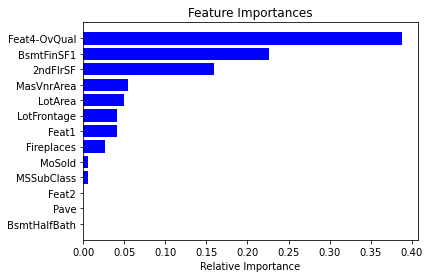

In [145]:
importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [146]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

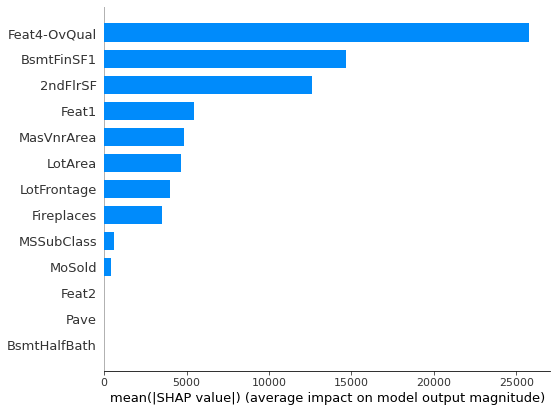

In [147]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

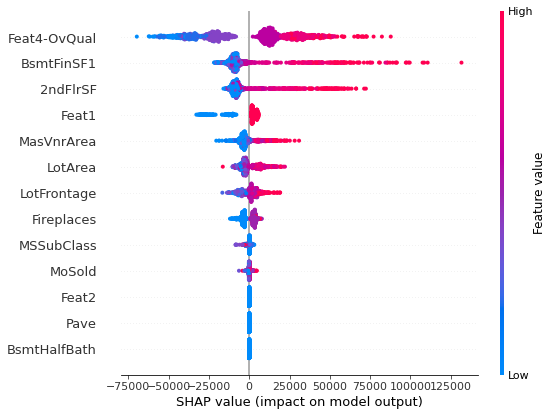

In [148]:
shap.summary_plot(shap_values, X_train)

In [149]:
X_train.drop(['Feat2','Pave','BsmtHalfBath'],axis=1,inplace=True)
X_test.drop(['Feat2','Pave','BsmtHalfBath'],axis=1,inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [150]:
print(X_train.shape,X_test.shape)

(1110, 10) (1392, 10)


In [151]:
#Now we have ten fetures which also includes the five new features that were created.

In [152]:
X_train.shape

(1110, 10)

In [153]:
mod = RandomForestRegressor(random_state=None)

In [154]:
mod.fit(X_train,y_train)

RandomForestRegressor()

In [155]:
pred= mod.predict(X_test.iloc[0:1110,:])
pred

array([117727.500000, 192138.970000, 141342.130000, ..., 197670.350000,
       108390.400000, 125627.500000])

In [156]:
y_train = y_train/100000
pred = pred/100000

In [157]:
mean_squared_error(y_train,pred)

0.8355000228971163

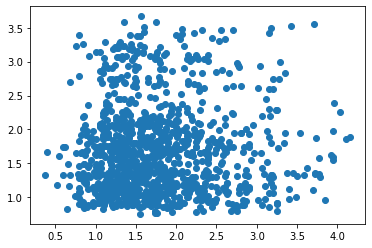

In [158]:
plt.scatter(y_train,pred)
plt.show()

In [159]:
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_train,pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_train,pred))
print('Root Mean Squared Error (RMSE):', metrics.mean_squared_error(y_train,pred, squared=False))
print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_train,pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_train,pred))
print('Max Error:', metrics.max_error(y_train,pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_train,pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_train,pred))
print('R^2:', metrics.r2_score(y_train,pred))
print('Mean Poisson Deviance:', metrics.mean_poisson_deviance(y_train,pred))
print('Mean Gamma Deviance:', metrics.mean_gamma_deviance(y_train,pred))

Mean Absolute Error (MAE): 0.7051371882282284
Mean Squared Error (MSE): 0.8355000228971163
Root Mean Squared Error (RMSE): 0.9140569035334268
Mean Absolute Percentage Error (MAPE): 0.42668777613994485
Explained Variance Score: -0.934127812452191
Max Error: 2.8855250000000003
Mean Squared Log Error: 0.10093652987652595
Median Absolute Error: 0.5434108500000001
R^2: -0.943654913298384
Mean Poisson Deviance: 0.4666038315970984
Mean Gamma Deviance: 0.2903542393943684
